In [ ]:
import cv2
import numpy as np
import argparse
import os
import matplotlib.pyplot as plt

# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Image path to the directory")
# args = vars(ap.parse_args())
# path = args['image']

path = "lena.jpg"

# 입력 받은 이미지를 불러옵니다.
src = cv2.imread(path)

# hsv 컬러 형태로 변형합니다.
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
# h, s, v로 컬러 영상을 분리 합니다. 
h, s, v = cv2.split(hsv)
# v값을 히스토그램 평활화를 합니다.
equalizedV = cv2.equalizeHist(v)
# h,s,equalizedV를 합쳐서 새로운 hsv 이미지를 만듭니다.
hsv2 = cv2.merge([h,s,equalizedV])
# 마지막으로 hsv2를 다시 BGR 형태로 변경합니다.
hsvDst = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)

# YCrCb 컬러 형태로 변환합니다.
yCrCb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
# y, Cr, Cb로 컬러 영상을 분리 합니다.
y, Cr, Cb = cv2.split(yCrCb)
# y값을 히스토그램 평활화를 합니다.
equalizedY = cv2.equalizeHist(y)
# equalizedY, Cr, Cb를 합쳐서 새로운 yCrCb 이미지를 만듭니다.
yCrCb2 = cv2.merge([equalizedY, Cr, Cb])
# 마지막으로 yCrCb2를 다시 BGR 형태로 변경합니다.
yCrCbDst = cv2.cvtColor(yCrCb2, cv2.COLOR_YCrCb2BGR)

# src, hsv, YCrCb 각각을 출력합니다.
cv2.imshow('src', src)
cv2.imshow('hsv dst', hsvDst)
cv2.imshow('YCrCb dst', yCrCbDst)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
import cv2

# 이미지 읽기
img = cv2.imread('lena.jpg', 1)

# 이미지 화면에 표시
cv2.imshow('Test Image', img)
cv2.waitKey(0)

In [ ]:
# 이미지 윈도우 삭제
cv2.destroyAllWindows()

In [ ]:
from __future__ import print_function
import cv2 as cv
import argparse
parser = argparse.ArgumentParser(description='Code for Histogram Equalization tutorial.')
parser.add_argument('--input', help='Path to input image.', default='lena.jpg')
args = parser.parse_args()
src = cv.imread(cv.samples.findFile(args.input))
if src is None:
    print('Could not open or find the image:', args.input)
    exit(0)
src = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
dst = cv.equalizeHist(src)
cv.imshow('Source image', src)
cv.imshow('Equalized Image', dst)
cv.waitKey()

hist.shape: (256, 1)
hist.sum(): 50625.0 img.shape: (225, 225)


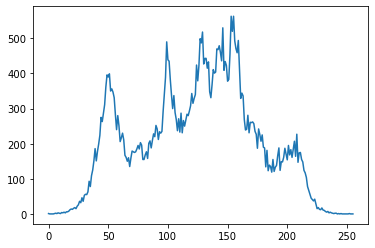

In [9]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 이미지 그레이 스케일로 읽기 및 출력
img = cv2.imread('../img/mountain.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('img', img)

#--② 히스토그램 계산 및 그리기
hist = cv2.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist)

print("hist.shape:", hist.shape)  #--③ 히스토그램의 shape (256,1)
print("hist.sum():", hist.sum(), "img.shape:",img.shape) #--④ 히스토그램 총 합계와 이미지의 크기
plt.show()

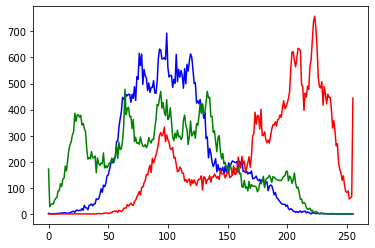

In [10]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 이미지 읽기 및 출력
img = cv2.imread('../img/mountain.jpg')
cv2.imshow('img', img)

#--② 히스토그램 계산 및 그리기
channels = cv2.split(img)
colors = ('b', 'g', 'r')
for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
plt.show()

(256,)


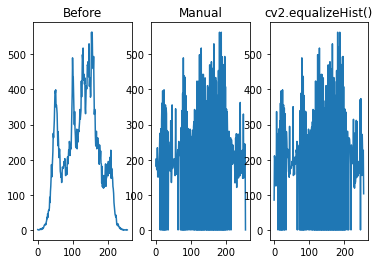

In [11]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 대상 영상으로 그레이 스케일로 읽기
img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape[:2]

#--② 이퀄라이즈 연산을 직접 적용
hist = cv2.calcHist([img], [0], None, [256], [0, 256]) #히스토그램 계산
cdf = hist.cumsum()                                     # 누적 히스토그램 
cdf_m = np.ma.masked_equal(cdf, 0)                      # 0(zero)인 값을 NaN으로 제거
cdf_m = (cdf_m - cdf_m.min()) /(rows * cols) * 255      # 이퀄라이즈 히스토그램 계산
cdf = np.ma.filled(cdf_m,0).astype('uint8')             # NaN을 다시 0으로 환원
print(cdf.shape)
img2 = cdf[img]                                         # 히스토그램을 픽셀로 맵핑

#--③ OpenCV API로 이퀄라이즈 히스토그램 적용
img3 = cv2.equalizeHist(img)

#--④ 이퀄라이즈 결과 히스토그램 계산
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([img3], [0], None, [256], [0, 256])

#--⑤ 결과 출력
cv2.imshow('Before', img)
cv2.imshow('Manual', img2)
cv2.imshow('cv2.equalizeHist()', img3)
hists = {'Before':hist, 'Manual':hist2, 'cv2.equalizeHist()':hist3}
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.plot(v)
plt.show()

In [13]:
import numpy as np, cv2

img = cv2.imread('lena.jpg') #이미지 읽기, BGR 스케일

#--① 컬러 스케일을 BGR에서 YUV로 변경
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) 

#--② YUV 컬러 스케일의 첫번째 채널에 대해서 이퀄라이즈 적용
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) 

#--③ 컬러 스케일을 YUV에서 BGR로 변경
img2 = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR) 

cv2.imshow('Before', img)
cv2.imshow('After', img2)
cv2.waitKey()
cv2.destroyAllWindows()